# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle, os, joblib
import seaborn as sb
import numpy as np

# Read in data from .csv

In [3]:
# Read in data set
data_set = pd.read_csv(r'C:\Users\newac\Desktop\stroke_data.csv')

In [4]:
# Verify data
data_set

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
# Identify completeness & identify missing values
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Remove unecessary features, handle missing values, transform values

In [6]:
# Remove ID Column
data_set.drop('id', axis = 1, inplace = True)

In [7]:
# Fill the null values in the data set with the mean BMI
data_set['bmi'].fillna(data_set['bmi'].mean(), inplace=True)

In [8]:
# Create label encoder to transform the object data types to int for model to use
encode = LabelEncoder()
gender = encode.fit_transform(data_set['gender'])

In [9]:
data_set['gender'] = gender

In [10]:
married = encode.fit_transform(data_set['ever_married'])

In [11]:
data_set['ever_married'] = married

In [12]:
work = encode.fit_transform(data_set['work_type'])

In [13]:
data_set['work_type'] = work

In [14]:
residence = encode.fit_transform(data_set['Residence_type'])

In [15]:
data_set['Residence_type'] = residence

In [16]:
smoke = encode.fit_transform(data_set['smoking_status'])

In [17]:
data_set['smoking_status'] = smoke

In [18]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Preparation & Training

In [19]:
x = data_set.drop('stroke', axis = 1)
y = data_set['stroke']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=None)

In [20]:
# Scale down the data
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

In [21]:
y_test.head()

2096    0
2367    0
2772    0
1487    0
2808    0
Name: stroke, dtype: int64

# DECISION TREE

In [22]:
dec_tree = DecisionTreeClassifier(random_state=1)

In [23]:
dec_tree.fit(x_train_scale, y_train)

DecisionTreeClassifier(random_state=1)

In [24]:
ypred = dec_tree.predict(x_test_scale)

In [25]:
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
score = accuracy_score(y_test, ypred)

In [27]:
score

0.9119373776908023

# Prepare & Save Model

In [28]:
scaler_path = os.path.join('C:/Users/newac/Desktop/flaskProject','model/decision_tree.pkl')
with open(scaler_path,'wb') as file:
    pickle.dump(scaler, file)

In [29]:
model_path = os.path.join('C:/Users/newac/Desktop/flaskProject','model/dt.sav')
joblib.dump(dec_tree,model_path)

['C:/Users/newac/Desktop/flaskProject\\model/dt.sav']

## Visualization

Text(0.5, 1.0, 'Correlation Heatmap')

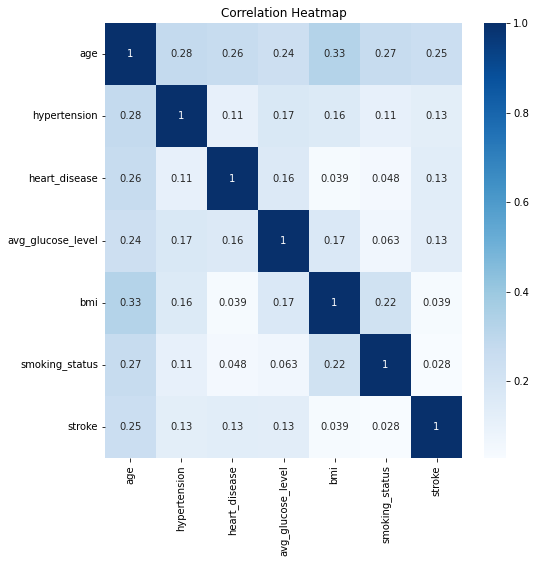

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))
heatmap = sb.heatmap(data_set[['age','hypertension', 'heart_disease', 'avg_glucose_level',
                                    'bmi', 'smoking_status', 'stroke']].corr(), cmap="Blues", vmax=1, annot=True,ax = ax)
heatmap.set_title('Correlation Heatmap')

# FEATURE IMPORTANCE

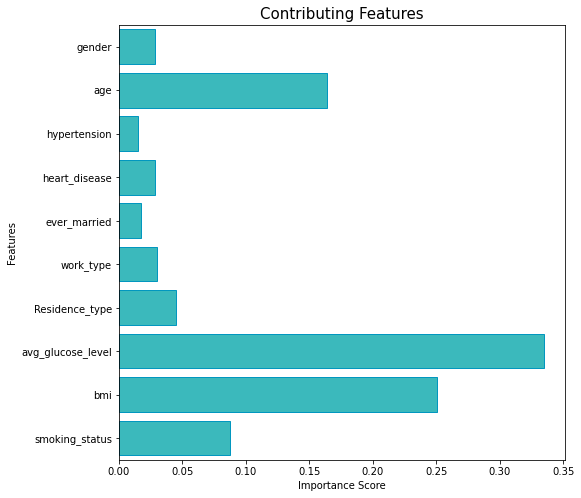

In [31]:
plt.figure(figsize=(8,8))
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title("Contributing Features",{'fontsize':15})
feature_imp1 = dec_tree.feature_importances_
sb.barplot(x=feature_imp1, y=data_set.columns.drop('stroke'), color='#26cdd1', edgecolor='#0297bf')
plt.show();

# STROKE BASED ON FEATURES

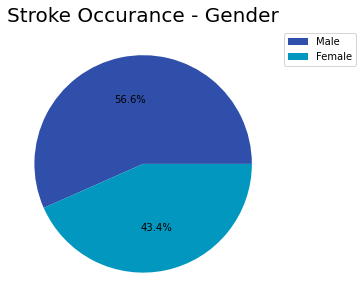

In [32]:
plt.figure(figsize=(5,5))
label = ["Male" , "Female"]
plt.title("Stroke Occurance - Gender",{'fontsize':20});
plt.pie(x=data_set.gender[data_set.stroke == 1].value_counts(),
        autopct='%1.1f%%',
        colors=['#2f4faa','#0297bf']);
plt.legend(label,bbox_to_anchor=(1.0, 1.0), loc="upper left");

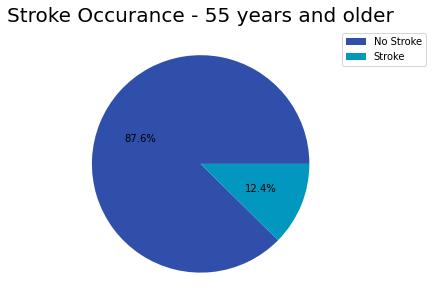

In [33]:
plt.figure(figsize=(5,5))
label = ["No Stroke" , "Stroke"]
plt.title("Stroke Occurance - 55 years and older",{'fontsize':20});
plt.pie(x=data_set.stroke[data_set.age > 55].value_counts(),
        autopct='%1.1f%%',
        colors=['#2f4faa','#0297bf']);
plt.legend(label,bbox_to_anchor=(1.0, 1.0), loc="upper left");

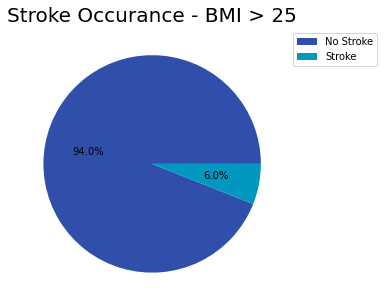

In [34]:
plt.figure(figsize=(5,5))
label = ["No Stroke" , "Stroke"]
plt.title("Stroke Occurance - BMI > 25",{'fontsize':20});
plt.pie(x=data_set.stroke[data_set.bmi > 25].value_counts(),
        autopct='%1.1f%%',
        colors=['#2f4faa','#0297bf']);
plt.legend(label,bbox_to_anchor=(1.0,1.0), loc="upper left");

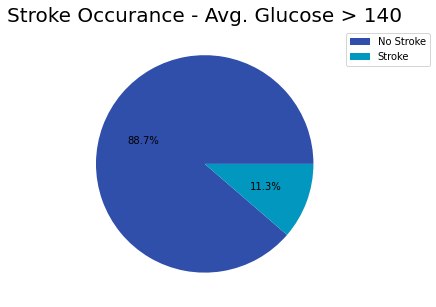

In [35]:
plt.figure(figsize=(5,5))
label = ["No Stroke" , "Stroke"]
plt.title("Stroke Occurance - Avg. Glucose > 140",{'fontsize':20});
plt.pie(x=data_set.stroke[data_set.avg_glucose_level > 140].value_counts(),
        autopct='%1.1f%%',
        colors=['#2f4faa','#0297bf']);
plt.legend(label,bbox_to_anchor=(1.0, 1.0), loc="upper left");

[Text(0.5, 1.0, 'Stroke Occurance by Age')]

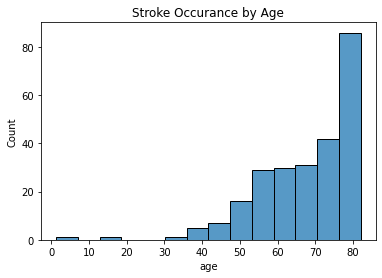

In [36]:
sb.histplot(data_set['age'][data_set.stroke == 1]).set(title='Stroke Occurance by Age')

[Text(0.5, 1.0, 'Stroke Occurance by Gender')]

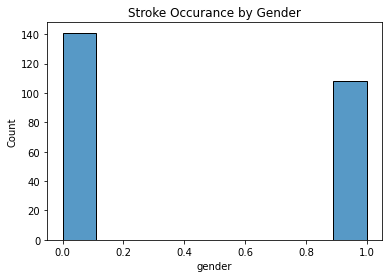

In [37]:
sb.histplot(data_set['gender'][data_set.stroke == 1]).set(title='Stroke Occurance by Gender')

[Text(0.5, 1.0, 'Stroke Occurance by BMI')]

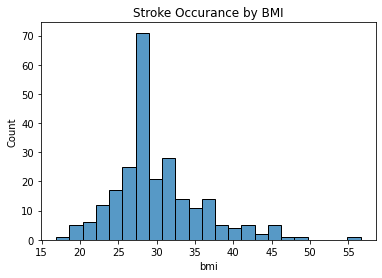

In [38]:
sb.histplot(data_set['bmi'][data_set.stroke == 1]).set(title='Stroke Occurance by BMI')

[Text(0.5, 1.0, 'Stroke Occurance by Avg. Glucose Level')]

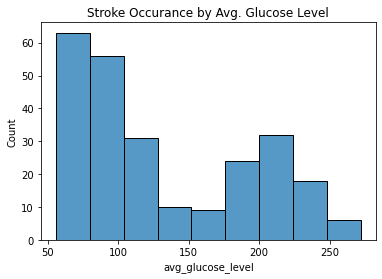

In [39]:
sb.histplot(data_set['avg_glucose_level'][data_set.stroke == 1]).set(title='Stroke Occurance by Avg. Glucose Level')